In [23]:
# import dependencies
import os
import re
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

## Load data

In [24]:
data = pd.read_csv('Eluvio_DS_Challenge.csv')

In [25]:
data[:10]

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
5,1201287889,2008-01-25,15,0,Hay presto! Farmer unveils the illegal mock-...,False,Armagedonovich,worldnews
6,1201289438,2008-01-25,5,0,"Strikes, Protests and Gridlock at the Poland-U...",False,Clythos,worldnews
7,1201536662,2008-01-28,0,0,The U.N. Mismanagement Program,False,Moldavite,worldnews
8,1201558396,2008-01-28,4,0,Nicolas Sarkozy threatens to sue Ryanair,False,Moldavite,worldnews
9,1201635869,2008-01-29,3,0,US plans for missile shields in Polish town me...,False,JoeyRamone63,worldnews


**Convert time_created to time stamp**

In [26]:
time_stamp_fn = lambda x: datetime.fromtimestamp(x)
data['time_created'] = data['time_created'].map(time_stamp_fn)
data.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,2008-01-25 03:34:06,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,2008-01-25 03:34:35,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,2008-01-25 03:42:03,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,2008-01-25 03:54:50,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,2008-01-25 15:25:20,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


## EDA

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509236 entries, 0 to 509235
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   time_created  509236 non-null  datetime64[ns]
 1   date_created  509236 non-null  object        
 2   up_votes      509236 non-null  int64         
 3   down_votes    509236 non-null  int64         
 4   title         509236 non-null  object        
 5   over_18       509236 non-null  bool          
 6   author        509236 non-null  object        
 7   category      509236 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(2), object(4)
memory usage: 27.7+ MB


=> No null values

In [28]:
data.describe()

,up_votes,down_votes
count,509236.000000,509236.0
mean,112.236283,0.0
std,541.694675,0.0
min,0.000000,0.0
25%,1.000000,0.0
50%,5.000000,0.0
75%,16.000000,0.0
max,21253.000000,0.0


In [29]:
data['down_votes'].value_counts()

0    509236
Name: down_votes, dtype: int64

=> Down_votes are all zeros

In [30]:
top_topics = data.sort_values('up_votes', ascending = False)
top_topics = list(top_topics['title'][:10])
print("Top 10 popular topics by upvotes: \n")
for x, idx in zip(top_topics, range(1, len(top_topics) + 1)):
    print(idx, ':', x, '\n')

Top 10 popular topics by upvotes: 

1 : A biotech startup has managed to 3-D print fake rhino horns that carry the same genetic fingerprint as the actual horn. The company plans to flood Chinese rhino horn market at one-eighth of the price of the original, undercutting the price poachers can get and forcing them out eventually. 

2 : Twitter has forced 30 websites that archive politician s deleted tweets to shut down, removing an effective tool to keep politicians honest 

3 : 2.6 terabyte leak of Panamanian shell company data reveals  how a global industry led by major banks, legal firms, and asset management companies secretly manages the estates of politicians, Fifa officials, fraudsters and drug smugglers, celebrities and professional athletes.  

4 : The police officer who leaked the footage of the surfers paradise police brutality, where the victims blood was washed away by officers, has been criminally charged for bringing it to the publics view. Officers who did the bashing get

**Processing titles**

In [31]:
# remove punctuation and stopwords
import re
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize
stopwords = stopwords.words('english')

# remove punctuations
punc_remove = lambda x: re.sub('[^a-zA-Z\d\s]', '', x.lower())
words_tokenized = data['title'].map(punc_remove)

# remove stopwords
stopwords_list = '|'.join([' ' + word + ' ' for word in stopwords])
stopword_remove = lambda x: re.sub(stopwords_list, ' ', x)
words_tokenized = words_tokenized.map(stopword_remove)

# tokenize
tokens = np.concatenate([word_tokenize(x) for x in words_tokenized])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Word Cloud**

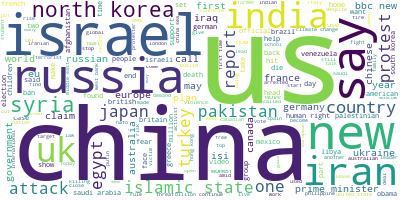

In [10]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(tokens)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

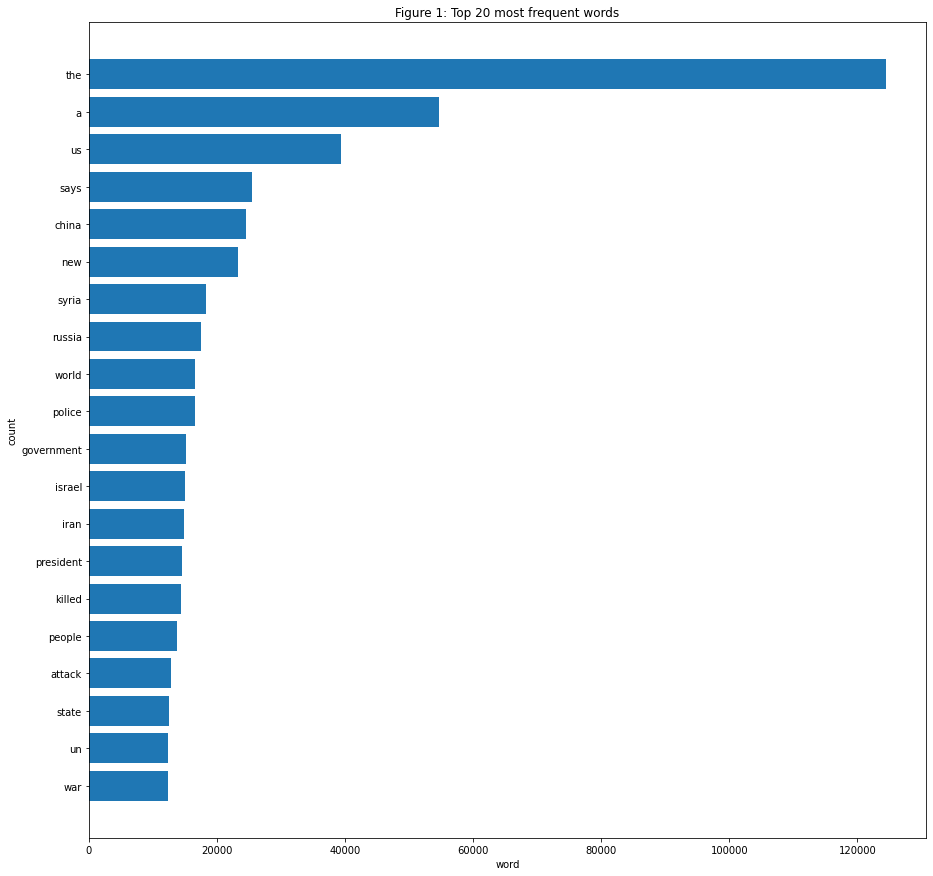

In [11]:
# get unique words with count
words, count = np.unique(tokens, return_counts = True)

# get top 20 words by count value
count_idx = np.argsort(count)[-20:]
plt.subplots(figsize = (15,15))
plt.barh(y = words[count_idx], width = count[count_idx])
plt.xlabel('word')
plt.ylabel('count')
plt.title("Figure 1: Top 20 most frequent words")
plt.show()

Look at the above word cloud and the word-count plot, most items are about **russia, china, israel, india, syria, or iran**.

**Title length**

In [12]:
# get title length
lengths = [len(x.split(' ')) for x in data['title']]
data['title_length'] = [len(sent) for sent in words_tokenized]

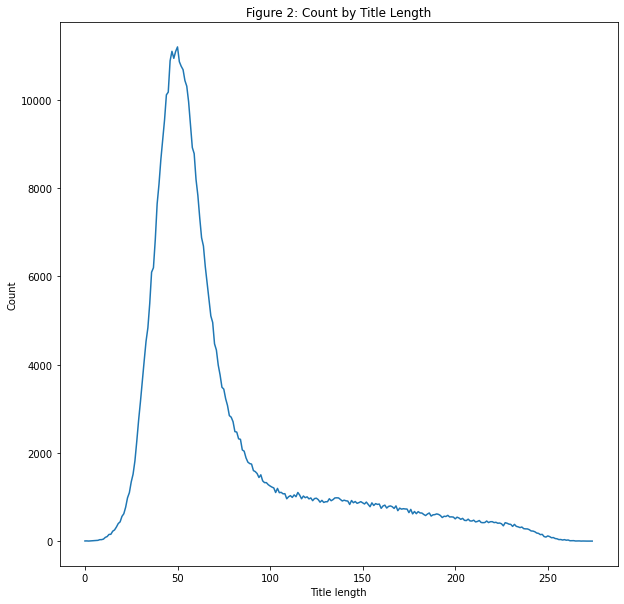

In [13]:
# plot: item count by title length
lengths = data[['title_length', 'date_created']].groupby('title_length').count()
plt.subplots(figsize = (10, 10))
plt.plot(lengths.index, lengths['date_created'])
plt.xlabel('Title length')
plt.ylabel('Count')
plt.title('Figure 2: Count by Title Length')
plt.show()

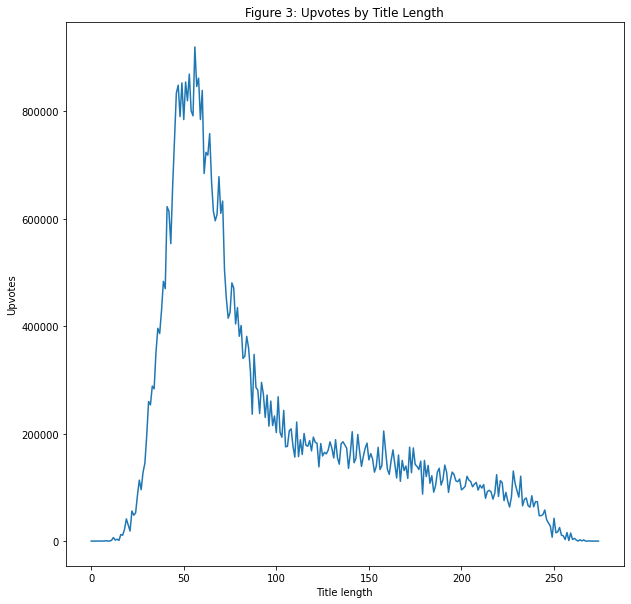

In [14]:
lengths = data[['title_length', 'up_votes']].groupby('title_length').sum()
plt.subplots(figsize = (10, 10))
plt.plot(lengths.index, lengths['up_votes'])
plt.xlabel('Title length')
plt.ylabel('Upvotes')
plt.title('Figure 3: Upvotes by Title Length')
plt.show()

Based on 2 plots, most items have title length around 50 words. Also, items with approoximatelly 50 words receive most upvotes. 

**Analysis of Upvotse by Date**

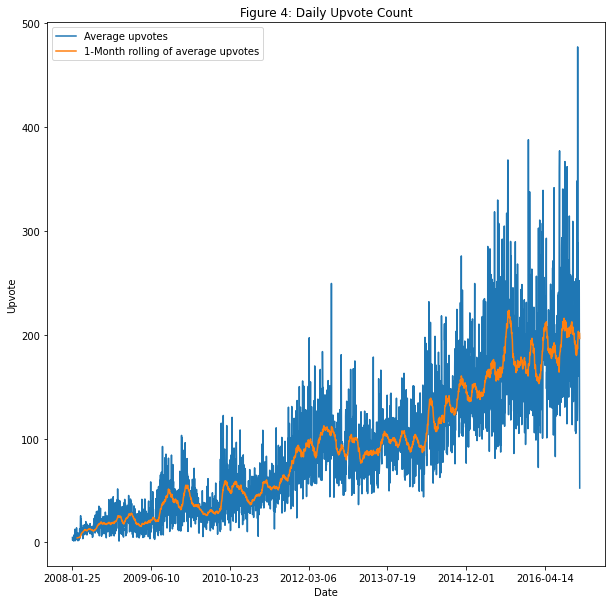

In [15]:
items_by_upvote = data.groupby('date_created')

# plot histogram
plt.subplots(figsize = (10, 10))
items_by_upvote['up_votes'].mean().plot()
items_by_upvote['up_votes'].mean().rolling(window = 31).mean().plot()
plt.xlabel('Date')
plt.ylabel('Upvote')
plt.legend(['Average upvotes', '1-Month rolling of average upvotes'])
plt.title('Figure 4: Daily Upvote Count')
plt.show()

Look at the plot, younger items receive more upvotes than older plots. As the given dataset provides no additionall information, the best explanation is that the upvote rise is due to the rising popularity of the platform which the item locates. This means that more users visit the platform.

**Analysis of Upvotes by Month and Year**

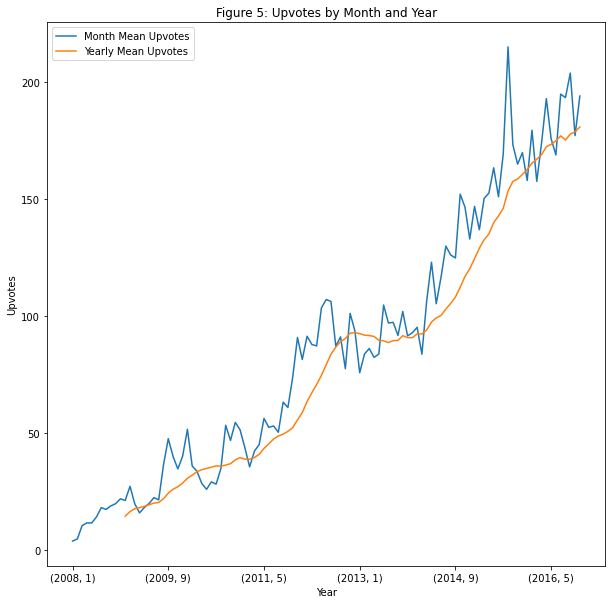

In [16]:
items_by_upvote = data.groupby([data['time_created'].dt.year, data['time_created'].dt.month])

# plot histogram
plt.subplots(figsize = (10, 10))
items_by_upvote['up_votes'].mean().plot()
items_by_upvote['up_votes'].mean().rolling(window = 12).mean().plot()
plt.xlabel('Year')
plt.ylabel('Upvotes')
plt.title("Figure 5: Upvotes by Month and Year")
plt.legend(['Month Mean Upvotes', 'Yearly Mean Upvotes'])
plt.show()

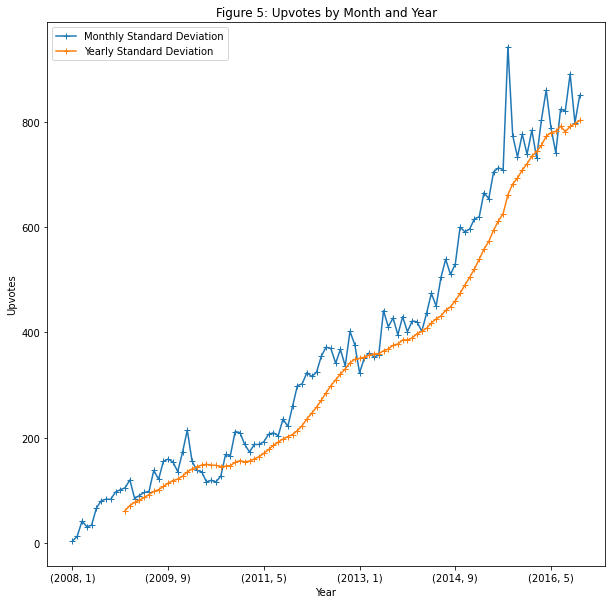

In [17]:
# plot histogram
plt.subplots(figsize = (10, 10))
items_by_upvote['up_votes'].std().plot(marker = '+')
items_by_upvote['up_votes'].std().rolling(window = 12).mean().plot(marker = '+')
plt.xlabel('Year')
plt.ylabel('Upvotes')
plt.title("Figure 5: Upvotes by Month and Year")
plt.legend(['Monthly Standard Deviation', 'Yearly Standard Deviation'])
plt.show()

Obvioulsy, the standard deviation(s) is higher than the corresponding mean(s). This means that the upvote count varies greatly among items within a month.

**Analysis of Authors by Upvotes**

In [18]:
print("There are {} unique authors".format(len(data['author'].unique())))

There are 85838 unique authors


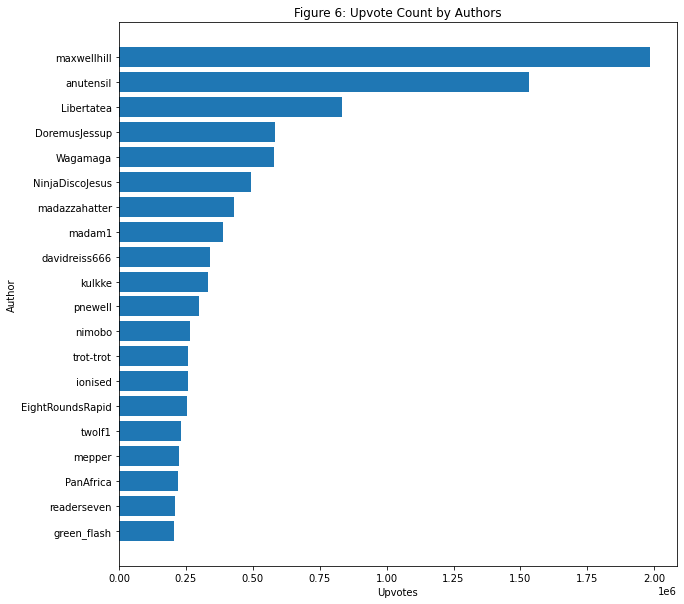

In [19]:
# get upvote counts by author
upvotes_author = data[['author', 'up_votes']].groupby('author').sum()

# get top 20 popular authors
upvotes_author = upvotes_author.sort_values('up_votes', ascending = False)[:20][::-1]

# plot upvote count by authors
plt.subplots(figsize = (10, 10))
plt.barh(y = upvotes_author.index, width = upvotes_author['up_votes'])
plt.xlabel('Upvotes')
plt.ylabel('Author')
plt.title('Figure 6: Upvote Count by Authors')
plt.show()

## Predicting attention given the title

After checking the Eluvio.live and Fabric Content platforms, I believe that artists wish a tool to know how much attention their products will gain given the product title only. Below, a ML/DL algorithm is developed to predict the upvote count given the name only.

### Convert upvote counts to binary class
The question is **Which upvote threshold says an item is popular?**\

For example, in 2008, a popular item has 100 upvotes; and a 2016 popular item has more than 10K upvotes. Mathematically, the popularity comparision between items in 2008 and 2016 is incompatiable.

Hence, we wil set the periodical upvote threshold that an item is popular when its upvote count is higher than the threshold, and vice versa. The upvote threshold for every item is the monthly upvote - 20% of standard deviation. The final prediction is the popular-item classification.

In [32]:
# compute the upvote threshold
grouped_upvote = data.groupby([data['time_created'].dt.year, data['time_created'].dt.month])
threshold_upvote = grouped_upvote.up_votes.mean() - 0.2*grouped_upvote.up_votes.std() # Minus standard deviation in order to generate balanced dataset
threshold_upvote

time_created  time_created
2008          1                3.182985
              2                2.252804
              3                2.243975
              4                5.454273
              5                4.921930
                                ...    
2016          7               29.950534
              8               28.973664
              9               25.528770
              10              17.420085
              11              23.842416
Name: up_votes, Length: 107, dtype: float64

In [33]:
data

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,2008-01-25 03:34:06,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,2008-01-25 03:34:35,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,2008-01-25 03:42:03,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,2008-01-25 03:54:50,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,2008-01-25 15:25:20,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
...,...,...,...,...,...,...,...,...
509231,2016-11-22 12:12:44,2016-11-22,5,0,Heil Trump : Donald Trump s alt-right white...,False,nonamenoglory,worldnews
509232,2016-11-22 12:12:52,2016-11-22,1,0,There are people speculating that this could b...,False,SummerRay,worldnews
509233,2016-11-22 12:17:36,2016-11-22,1,0,Professor receives Arab Researchers Award,False,AUSharjah,worldnews
509234,2016-11-22 12:19:17,2016-11-22,1,0,Nigel Farage attacks response to Trump ambassa...,False,smilyflower,worldnews


In [34]:
# assign threshold upvote for each item
data['label'] = data.apply(lambda sample: 1 if sample['up_votes'] >= threshold_upvote[(sample['time_created'].year, sample['time_created'].month)] else 0, axis = 1)

In [35]:
data['label'].sum() # total number of popular items (based on the generated labels)

154924

Despite effort, the generated labels are imbalanced. This could be an issue in classification. Requires confusion matrix for evaluation

#### Text Processing

In [36]:
# remove punctuations and numbers & lower text
# Number removal was conducted because numbers may become top TF-IDF features. However, they do not provide meaningful context.
punc_remove = lambda x: re.sub('[^a-zA-Z\s]|[\d]', '', x.lower())
data['title'] = data['title'].map(punc_remove)

# remove stopwords
stopwords_list = '|'.join([' ' + word + ' ' for word in stopwords])
stopword_remove = lambda x: re.sub(stopwords_list, ' ', x)
data['title'] = data['title'].map(stopword_remove)

In [37]:
data['title']

0                            scores killed pakistan clashes
1                          japan resumes refuelling mission
2                              us presses egypt gaza border
3                   jumpstart economy give health care all 
4               council europe bashes euun terror blacklist
                                ...                        
509231     heil trump  donald trump  altright  white nat...
509232    there people speculating this could madeleine ...
509233            professor receives arab researchers award
509234    nigel farage attacks response trump ambassador...
509235    palestinian wielding knife shot dead west bank...
Name: title, Length: 509236, dtype: object

### Split dataset into train, eval, and test sets
By ratio: 80%, 10%, and 10%

In [58]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data['title'], data['label'], test_size = 0.2, shuffle = True, random_state = 42)

In [59]:
val_x, test_x, val_y, test_y = train_test_split(test_x, test_y, test_size = 0.5, shuffle = False)

### Feature Extraction

#### Extract TF-IDF of text

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
# use TfidfVectorizer from sklearn
# for preprocessing, removing all punctutations and numbers in order to reveal words
# limit number of features (vocabularies) to 200
# extract TF-IDF features and labels
vectorizer = TfidfVectorizer(lowercase=True, stop_words={'english'}, use_idf = True, max_features=200)
vectorizer.fit(train_x)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=200,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words={'english'}, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [65]:
# generate features
train_features = vectorizer.transform(train_x)
val_features = vectorizer.transform(val_x)
test_features = vectorizer.transform(test_x)

### Model development

#### SVM

In [64]:
from sklearn.svm import SVC

# generatee c_values frmo 0.001 to 100
# C in SVM algorithm specifies width of the hyperplane. The bigger the hyperplane is, the more smaples are classified
c_range = np.arange(-3.0, 2.0, 1.0)
c_values = np.power(10.0, c_range)

svms = {}
for c in c_values:
  svms[c] = SVC(kernel = 'rbf', verbose = 1, max_iter = 2000, C = c) # set iteration to 2000
  svms[c].fit(train_features, train_y)

[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [43]:
from sklearn.metrics import confusion_matrix

for c in c_values:
  # confusion matrix on train set
  y_pred = svms[c].predict(train_set[0])
  m = confusion_matrix(y_pred, train_y, labels = [1,0])
  print('Confusion matrix on validation set given C = {} is \n{}'.format(c, m))
  print('Training accuracy = {}, precision = {}, and recall = {}'.format((m[0][0] + m[1][1]) / m.sum(), m[0][0] / (m[0][0]+ m[1][0]), m[0][0] / (m[0][0] + m[0][1])))

  # confusion matrix on validation set
  y_pred = svms[c].predict(val_set[0])
  m = confusion_matrix(y_pred, val_y, labels = [1,0])
  print('Confusion matrix on validation set given C = {} is \n{}'.format(c, m))
  print('Validation accuracy = {}, precision = {}, and recall = {}'.format((m[0][0] + m[1][1]) / m.sum(), m[0][0] / (m[0][0]+ m[1][0]), m[0][0] / (m[0][0] + m[0][1])))

  # test set
  y_pred = svms[c].predict(test_set[0])
  m = confusion_matrix(y_pred, test_y, labels = [1, 0])
  print('Confusion matrix on test set given C = {} is \n{}'.format(c, m))
  print('Testing accuracy = {}, precision = {}, and recall = {}'.format((m[0][0] + m[1][1]) / m.sum(), m[0][0] / (m[0][0]+ m[1][0]), m[0][0] / (m[0][0] + m[0][1])))

  print('\n****************\n')

Confusion matrix on validation set given C = 0.001 is [[ 27705  96378]
 [ 51108 232193]]

Training accuracy = 0.6379681087131551, precision = 0.35152830116858896, and recall = 0.22327796716713813
Confusion matrix on validation set given C = 0.001 is [[ 3535 11960]
 [ 6369 29059]]

Validation accuracy = 0.6400644109734305, precision = 0.3569264943457189, and recall = 0.2281381090674411
Confusion matrix on test set given C = 0.001 is [[ 3441 11905]
 [ 6299 29284]]

Testing accuracy = 0.6425612126686171, precision = 0.3532854209445585, and recall = 0.22422781180763718

****************

Confusion matrix on validation set given C = 0.01 is [[ 27705  96378]
 [ 51108 232193]]

Training accuracy = 0.6379681087131551, precision = 0.35152830116858896, and recall = 0.22327796716713813
Confusion matrix on validation set given C = 0.01 is [[ 3535 11960]
 [ 6369 29059]]

Validation accuracy = 0.6400644109734305, precision = 0.3569264943457189, and recall = 0.2281381090674411
Confusion matrix on tes

Given TF-IDF with 200 features/vocabs, the SVM algorithm performs poorly. Look at the precisions and recalls, they are under 50%. Even though accuracy is high (around 67%), the accuracy metric is not the best performance measurement. When the C value becomes higher, the recalls and precisions are improved. This observation is expected since the higher C is expected to yield less misclassification by narrowing the hyperplane. However, wheen C = 1.0 and 10.0, the precisions and recalls are unexpectedly low. Hence, the optimal C value is 0.1

SVM is a weak learner due to the imbalanced dataset. Hence, Bagging with Underssampling is applied for SVM with C = 0.1

In [66]:
!pip3 install imblearn
from imblearn.ensemble import BalancedBaggingClassifier

In [85]:
# define and train model
model = SVC(kernel = 'rbf', verbose = 1, max_iter = 2000, C = 0.1)
model = BalancedBaggingClassifier(base_estimator=model, n_estimators=5, sampling_strategy='not minority', random_state=42, bootstrap = True) # 10 base SVMs
model.fit(train_features, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


BalancedBaggingClassifier(base_estimator=SVC(C=0.1, break_ties=False,
                                             cache_size=200, class_weight=None,
                                             coef0=0.0,
                                             decision_function_shape='ovr',
                                             degree=3, gamma='scale',
                                             kernel='rbf', max_iter=2000,
                                             probability=False,
                                             random_state=None, shrinking=True,
                                             tol=0.001, verbose=1),
                          bootstrap=True, bootstrap_features=False,
                          max_features=1.0, max_samples=1.0, n_estimators=5,
                          n_jobs=1, oob_score=False, random_state=42,
                          ratio=None, replacement=False,
                          sampling_strategy='not minority', verbose=0,
                   

In [86]:
# confusion matrix on train set
y_pred = model.predict(train_features)
m = confusion_matrix(y_pred, train_y, labels = [1,0])
print('Confusion matrix on validation set given C = {} is \n{}'.format(0.1, m))
print('Training accuracy = {}, precision = {}, and recall = {}'.format((m[0][0] + m[1][1]) / m.sum(), m[0][0] / (m[0][0]+ m[1][0]), m[0][0] / (m[0][0] + m[0][1])))

# confusion matrix on validation set
y_pred = model.predict(val_features)
m = confusion_matrix(y_pred, val_y, labels = [1,0])
print('Confusion matrix on validation set given C = {} is \n{}'.format(0.1, m))
print('Validation accuracy = {}, precision = {}, and recall = {}'.format((m[0][0] + m[1][1]) / m.sum(), m[0][0] / (m[0][0]+ m[1][0]), m[0][0] / (m[0][0] + m[0][1])))

# test set
y_pred = model.predict(test_features)
m = confusion_matrix(y_pred, test_y, labels = [1, 0])
print('Confusion matrix on test set given C = {} is \n{}'.format(0.1, m))
print('Testing accuracy = {}, precision = {}, and recall = {}'.format((m[0][0] + m[1][1]) / m.sum(), m[0][0] / (m[0][0]+ m[1][0]), m[0][0] / (m[0][0] + m[0][1])))

Confusion matrix on validation set given C = 0.1 is 
[[ 22923  45138]
 [101149 238178]]
Training accuracy = 0.6409148035779159, precision = 0.18475562576568444, and recall = 0.33680081103715787
Confusion matrix on validation set given C = 0.1 is 
[[ 2797  5755]
 [12586 29786]]
Validation accuracy = 0.6398358337915325, precision = 0.1818240915296106, and recall = 0.3270579981290926
Confusion matrix on test set given C = 0.1 is 
[[ 2819  5647]
 [12650 29808]]
Testing accuracy = 0.6406998664676773, precision = 0.18223543861917382, and recall = 0.3329789747224191


* The bagging method improves the recalls to 33%. 
* Comparing the confusion metrics of the bagging classifier with the above classifiers, the recall improvement is a hint that more minority-class samples are classified correctly. However, the declining precision says that more majority-class samples are classified incorrectly. 
* By using the BalancedBagging API, the number of samples for each class is equal in each class. Hence, the declining precision means that the imbalance ratio is so severve that the resampling techinques may negatively affec majority-class representations. Hence, the class imbalance in this problem requires further work. 
* Bagging with resampling is a commong technique to deal the class imbalance. However, the bagging leads to the longer training time.

* Transformer models (e.g. BERT, BART) are not applied in this problem. They may boost the classification accuracy. However, the real issue is the class imbalance. Hence, Transformer models are overkill in this problem.